
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 85 </p>
## <p style="text-align: center;">Due: Thursday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Group Partners
# Truett Bloxsom tsb962
# Jake Hill jah8787

# Question 1. Bias-variance (30pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [1]:
import numpy as np
np.random.seed(11)
x_train = np.loadtxt("X_q0_train.csv").reshape(-1,1)
y_train = np.loadtxt("Y_q0_train.csv").reshape(-1,1)
x_test = np.loadtxt("X_q0_test.csv").reshape(-1,1)
y_test = np.loadtxt("Y_q0_test.csv").reshape(-1,1)
x_all = np.linspace(-10,10,101).reshape(-1,1)

We want to build a model that can predict y for unknown inputs x.

(a) (10pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data (y_train vs x_train and y_test vs x_test), fitted model (prediction on x_all vs x_all), and predictions on the test set (prediction on x_test vs x_test), clearly denoting the training, testing, and predicted points. All the plots must be in the same figure and be clearly labeled.

(b) (15pts) Fit polynomial models of degrees 2, 3 and 4, and the two given MLP Regression models (these two models will run for a different number of iterations when you fit them) to the training data. Report mean squared error (on both train and test sets) for all the models. Plot the data (y_train vs x_train and y_test vs x_test), the fitted models (prediction on x_all by different models vs x_all), and the predictions on the test set (prediction on x_test by different models vs x_test). All the plots must be in the same figure and be clearly labeled.

(c) (5pts) Which of the polynomial models performed the best? Explain using the bias-variance tradeoff.


In [2]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [3]:
#MLP Regression models for (b)
from sklearn.neural_network import MLPRegressor
mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh')
mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh')

In [4]:
#some useful code for plotting
# ax.plot(x_test, y_pred, 'blue', marker='o', )
# ax.plot(x_all, y_all, 'g')

## Answer
(a)

MSE on test set = 1204.2491913174892


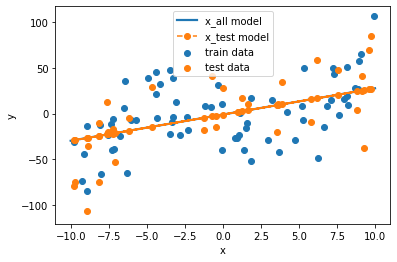

In [84]:
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
Y_pred = reg.predict(x_test)
print("MSE on test set =",metrics.mean_squared_error(y_test, Y_pred))

import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, label = "train data")
plt.scatter(x_test, y_test, label = "test data")
plt.plot(x_all,
         reg.predict(x_all),
         linewidth = 2.2,
         label = "x_all model")

plt.plot(x_test,
         reg.predict(x_test),
         marker='o', linestyle='dashed',
         label = "x_test model")
plt.ylabel('y')
plt.xlabel("x")
plt.legend()
plt.show()

(b)

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.pyplot import figure

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.neural_network import MLPRegressor
mlp_1 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=2000, activation='tanh')
mlp_2 = MLPRegressor(hidden_layer_sizes=100, alpha=0.001, max_iter=200,  activation='tanh')


In [96]:
def reg_n_plot(p_degree, x_train, y_train, x_all, x_test, y_test):
    
    poly = PolynomialFeatures(degree = p_degree)

    x_poly = poly.fit_transform(x_train)
    reg.fit(x_poly, y_train)
    Y_pred = reg.predict(x_poly)
    print("MSE of x_poly{} train set =".format(p_degree), metrics.mean_squared_error(y_train, Y_pred))

    ax.plot(x_all,
             reg.predict(poly.fit_transform(x_all)),
             linewidth = 2.2,
             label = "poly{} model".format(p_degree))
    
    x_poly = poly.fit_transform(x_test)
    Y_pred = reg.predict(x_poly)
    print("MSE of x_poly{} test set =".format(p_degree), metrics.mean_squared_error(y_test, Y_pred))

In [97]:
def net_n_plot(mlp, nnet, x_train, y_train, x_all, x_test, y_test):
    mlp = mlp
    mlp.fit(x_train, y_train)
    Y_pred = mlp.predict(x_train)
    print("MSE of {} train set =".format(nnet), metrics.mean_squared_error(y_train, Y_pred))

    ax.plot(x_all,
             mlp.predict(x_all),
             linewidth = 2.2,
             label = "{} model".format(nnet))

    mlp.fit(x_train, y_train)
    Y_pred = mlp.predict(x_test)
    print("MSE of {} test set =".format(nnet), metrics.mean_squared_error(y_test, Y_pred))

MSE of x_poly2 train set = 959.5190206385591
MSE of x_poly2 test set = 1276.3920769678755
MSE of x_poly3 train set = 624.5354778268198
MSE of x_poly3 test set = 1152.28399170982
MSE of x_poly4 train set = 622.4127493286283
MSE of x_poly4 test set = 1183.1992247368405
MSE of mlp_1 train set = 643.7302332280607
MSE of mlp_1 test set = 1094.3988749683303
MSE of mlp_2 train set = 1026.9245710892064
MSE of mlp_2 test set = 1439.826091110971


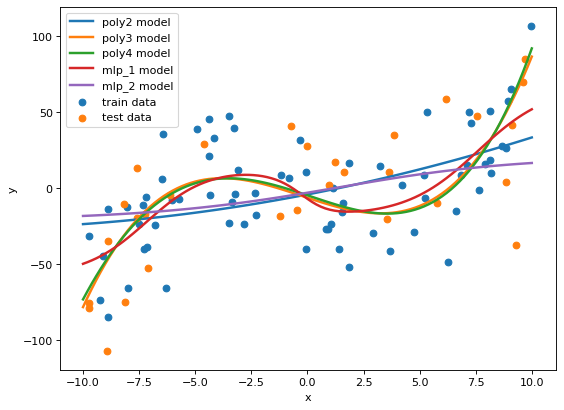

In [98]:
figure(num = None, figsize = (8, 6), dpi = 80, facecolor = "w", edgecolor = "k")

ax = plt.gca()

reg_n_plot(2, x_train, y_train, x_all, x_test, y_test)
reg_n_plot(3, x_train, y_train, x_all, x_test, y_test)
reg_n_plot(4, x_train, y_train, x_all, x_test, y_test)
net_n_plot(mlp_1, "mlp_1", x_train, y_train, x_all, x_test, y_test)
net_n_plot(mlp_2, "mlp_2", x_train, y_train, x_all, x_test, y_test)

ax.scatter(x_train, y_train, label = "train data")
ax.scatter(x_test, y_test, label = "test data")

plt.ylabel('y')
plt.xlabel("x")
plt.legend()
plt.show()

(c) 

Answer: based off of test MSE, a 3rd degree polynomial had the lowest MSE compared to the other polynomials. As you increase the degree of polynomials, you increase the potential variation the model can obtain. with this data, the 2nd degree polynomial did not have enough variance to follow the true signal of the data. The 4th degree polynomial had too much variation and slightly overfit the data. 

# Question 2. Number of data points required for Linear Regression (30pts)

In this question, we will explore empirically estimating a known data distribution. Let the data be generated by the probabilistic model $y_i = w^T x_i + \epsilon$. Here $x$ is 10 dimensional, and it's features are uniformly drawn values from $0$ to $1$. The true coefficients $w$ are set to be $1, 2, 3, \dots, 10$. Epsilon is drawn from a 0 mean unit variance normal distribution. We can now estimate these true coefficients by using linear regression on sample data points from the distribution. 

1. Generate 100 sample points $(x, y)$ according to the above distribution. Use the [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) function. (2pts)
2. Fit a linear regression model through the above data and report the MSE. (3 pts)
3. Generate 50 sample points $(x, y)$ to be the test set. Now, generate different amounts of train data points ranging from 20 data points to 1000 data points (intervals of 1) and plot how the MSE varies with increasing the train data. At the point where the MSE is minimum, print the corresponding coefficients. (10pts)
4. In this question, since we know the true coefficients, we can investigate how close the estimated coefficients are to the true coefficients. We will use $MSE(coefficients)$ which is MSE between the true coefficients and the estimated coefficients as the metric to see how close the estimated coefficients are to the true coefficients; this is not to be confused with the MSE between the predicted $y$ and the true $y$ which is commonly used. Hence, $MSE(coefficients) = \frac{1}{num\_coefficients}\sum_{i=1}^{num\_coefficients} (\theta_i - \hat{\theta}_i)^2$ where $\theta_i$ are the true coefficients and $\hat{\theta}_i$ are the estimated coefficients.
Using the $MSE(coefficients)$ as the metric, about how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes). Now, use only the first three coefficients, generate $x$ which is 3 dimensional (instead of 10 dimensional as before) and the corresponding $y$ for each $x$. In this case, when $x$ is three dimensional, how many data points are required to have $MSE(coefficients)$ < 0.01? (run this for 10 trials and report the average number of data points it takes).(15pts)


In [10]:
#some useful code
# w_true = np.arange(10)+1
# x = np.random.uniform(size=(n, 10))
# e = np.random.normal(size=(n))


#for (30)
#use - 
#for num_data_points in range(20, 1001):

#for 5) the following code is useful:
# w_true_3 = w_true[0:3]
# x_3_dimensional = np.random.uniform(size=(n, 3))

1.

In [100]:
np.random.seed(11)
n = 100
w_true = np.arange(10)+1
x = np.random.uniform(size=(n, 10))
e = np.random.normal(size=(n))

y = np.matmul(x, w_true) + e

2.

In [101]:
reg = linear_model.LinearRegression()
reg.fit(x, y)
Y_pred = reg.predict(x)
print("MSE all data =",metrics.mean_squared_error(y, Y_pred))

MSE all data = 1.0134375615734867


3.

In [103]:
np.random.seed(11)
n_t = 50
w_true_t = np.arange(10)+1
x_t = np.random.uniform(size=(n_t, 10))
e_t = np.random.normal(size=(n_t))

y_t = np.matmul(x_t, w_true_t) + e_t

n_s = 20
MSE_s = []
MSE_t = []
while n_s < 1001:
    x_s = np.random.uniform(size=(n_s, 10))
    e_s = np.random.normal(size=(n_s))
    y_s = np.matmul(x_s, w_true) + e_s
    
    reg.fit(x_s[:n_s], y_s[:n_s])
    Y_pred_s = reg.predict(x_s[:n_s])
    MSE = metrics.mean_squared_error(Y_pred_s, y_s[:n_s])
    MSE_s.append(MSE)
    
    Y_pred_t = reg.predict(x_t)
    MSE = metrics.mean_squared_error(Y_pred_t, y_t)
    MSE_t.append(MSE)
    
    n_s += 1  

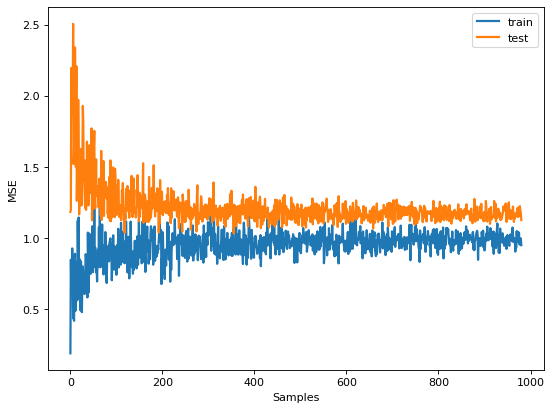

min test MSE = 1.033941699576991
best number of samples = 355


(-0.2035021620768056,
 array([ 0.92825498,  1.89176543,  3.05590355,  4.08221775,  5.05138534,
         5.84174171,  7.1508729 ,  8.1108535 ,  9.00199751, 10.15124647]))

In [104]:
figure(num = None, figsize = (8, 6), dpi = 80, facecolor = "w", edgecolor = "k")
az = plt.gca()
az.plot(MSE_s, linewidth = 2, label = "train")

az.plot(MSE_t, linewidth = 2, label = "test")
plt.ylabel('MSE')
plt.xlabel("Samples")
plt.legend()
plt.show()

print("min test MSE =",min(MSE_t))
x = np.array(MSE_t)
best_mSE = np.min(np.where(x == min(MSE_t)))
print("best number of samples =",best_mSE)

x_s = np.random.uniform(size=(best_mSE, 10))
e_s = np.random.normal(size=(best_mSE))
y_s = np.matmul(x_s, w_true) + e_s
reg.fit(x_s[:best_mSE], y_s[:best_mSE])

reg.fit(x_s[:best_mSE], y_s[:best_mSE])
reg.intercept_, reg.coef_

4. 

In [105]:
n_data_points = []
for i in range(0,10):
    n_s = 20
    MSE_errors = []
    mse_error = 1
    while mse_error > .01:
        x_s = np.random.uniform(size=(n_s, 10))
        e_s = np.random.normal(size=(n_s))
        y_s = np.matmul(x_s, w_true) + e_s

        reg.fit(x_s[:n_s], y_s[:n_s])
        Y_pred_s = reg.predict(x_s[:n_s])
        Y_pred_t = reg.predict(x_t)

        mse_error = metrics.mean_squared_error(w_true, reg.coef_[:n_s])

        MSE_errors.append(mse_error)

        n_s += 1
        
    n_s -= 1
    #print(n_s)
    n_data_points.append(n_s)

In [106]:
def Average(lst): 
    return sum(lst) / len(lst) 

average = Average(n_data_points) 
print("Average number of data points needed to reduce MSE < .01 for 10 dimensions =", round(average, 2)) 

Average number of data points needed to reduce MSE < .01 = 361.9


In [107]:
np.random.seed(11)
n_t = 50
w_true_t = np.arange(3)+1
x_t = np.random.uniform(size=(n_t, 3))
e_t = np.random.normal(size=(n_t))

n_data_points = []
for i in range(0,10):
    n_s = 20
    MSE_errors = []
    mse_error = 1
    while mse_error > .01:
        w_true = np.arange(3)+1
        x_s = np.random.uniform(size=(n_s, 3))
        e_s = np.random.normal(size=(n_s))
        y_s = np.matmul(x_s, w_true) + e_s

        reg.fit(x_s[:n_s], y_s[:n_s])
        Y_pred_s = reg.predict(x_s[:n_s])
        Y_pred_t = reg.predict(x_t)

        mse_error = metrics.mean_squared_error(w_true, reg.coef_[:n_s])

        MSE_errors.append(mse_error)

        n_s += 1
        
    n_s -= 1
    #print(n_s)
    n_data_points.append(n_s)
#print("loop finished")

In [110]:
average = Average(n_data_points) 
print("Average number of data points needed to reduce MSE < .01 for 3 dimensions =", round(average, 2)) 

Average number of data points needed to reduce MSE < .01 for 3 dimensions = 78.4


# Question 3. Data Imputation Strategies (20pts)

The missing value problem is inevitable in predictive modeling and in order to build a useful model, it is important that these missing values are handled appropriately. There could be many reasons for the presence of missing values(represented as NaN in python) in the dataset, like the absence of information corresponding to the variable, failure to record the available value of the variable, some unknown semantics associated with NaN, etc. 

For the given dataset(file named q3_dataset.csv), fit a Linear Regression model to predict the dependent variable 'ViolentCrimesPerPop'. If you directly try to fit a model you would see an error saying that input contains NaN. So, in order to successfully fit a model, you need to handle these missing values and the performance of your model would depend on how you handle them. 

Your task is to try different imputation strategies for the different columns having missing values and see what works best. You could try the following -
1. Discard rows with missing data
2. Fill NaNs with 0s
3. Fill NaNs with column mean/mode/median
4. Use information from related columns (think of how you could do this)

A strategy could work better for one column and not work for another. Briefly justify why do you think that a particular strategy works better than the other.

Hint: Think about how do the missing values occur for a particular column like are they random or systematic, do they have any semantics?

In [114]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
import numpy as np

dataset = pd.read_csv('q3_dataset.csv')
print("Column-wise missing value percentage")
print(dataset.isnull().sum()/len(dataset)*100)

X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset['ViolentCrimesPerPop']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)

Column-wise missing value percentage
ViolentCrimesPerPop     0.000000
PolicBudgPerPop        84.002006
population              9.979940
householdsize          19.959880
numbUrban               7.321966
pctUrban                0.000000
medIncome               0.000000
perCapInc               0.000000
LandArea                0.000000
PopDens                 0.000000
PolicCars              84.002006
PctUnemployed           4.964895
PctEmploy               4.964895
dtype: float64


In [115]:
X.describe() #are there O entries instead of Nan? looks like it

,PolicBudgPerPop,population,householdsize,numbUrban,pctUrban,medIncome,perCapInc,LandArea,PopDens,PolicCars,PctUnemployed,PctEmploy
count,319.000000,1795.000000,1596.000000,1848.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,319.000000,1895.000000,1895.000000
mean,0.195078,0.056641,0.464123,0.066310,0.696269,0.361123,0.350251,0.065231,0.232854,0.163103,0.363182,0.501340
std,0.164718,0.122465,0.163635,0.132721,0.444811,0.209362,0.191109,0.109459,0.203092,0.214778,0.201943,0.173407
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.110000,0.010000,0.350000,0.000000,0.000000,0.200000,0.220000,0.020000,0.100000,0.040000,0.215000,0.380000
50%,0.150000,0.020000,0.440000,0.030000,1.000000,0.320000,0.300000,0.040000,0.170000,0.080000,0.320000,0.510000
75%,0.220000,0.050000,0.540000,0.070000,1.000000,0.490000,0.430000,0.070000,0.280000,0.195000,0.480000,0.630000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [116]:
duplicateRowsDF = dataset[dataset.duplicated()]
 
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [ViolentCrimesPerPop, PolicBudgPerPop, population, householdsize, numbUrban, pctUrban, medIncome, perCapInc, LandArea, PopDens, PolicCars, PctUnemployed, PctEmploy]
Index: []


In [126]:
df = dataset[(dataset["population"] == 0)]
print("number of rows having population = 0 is",len(df)) #this seems weird, how can a city have 0 population, how is population measured?
print("original rows of dataset =", len(dataset))

number of rows having population = 0 is 353
original rows of dataset = 1994


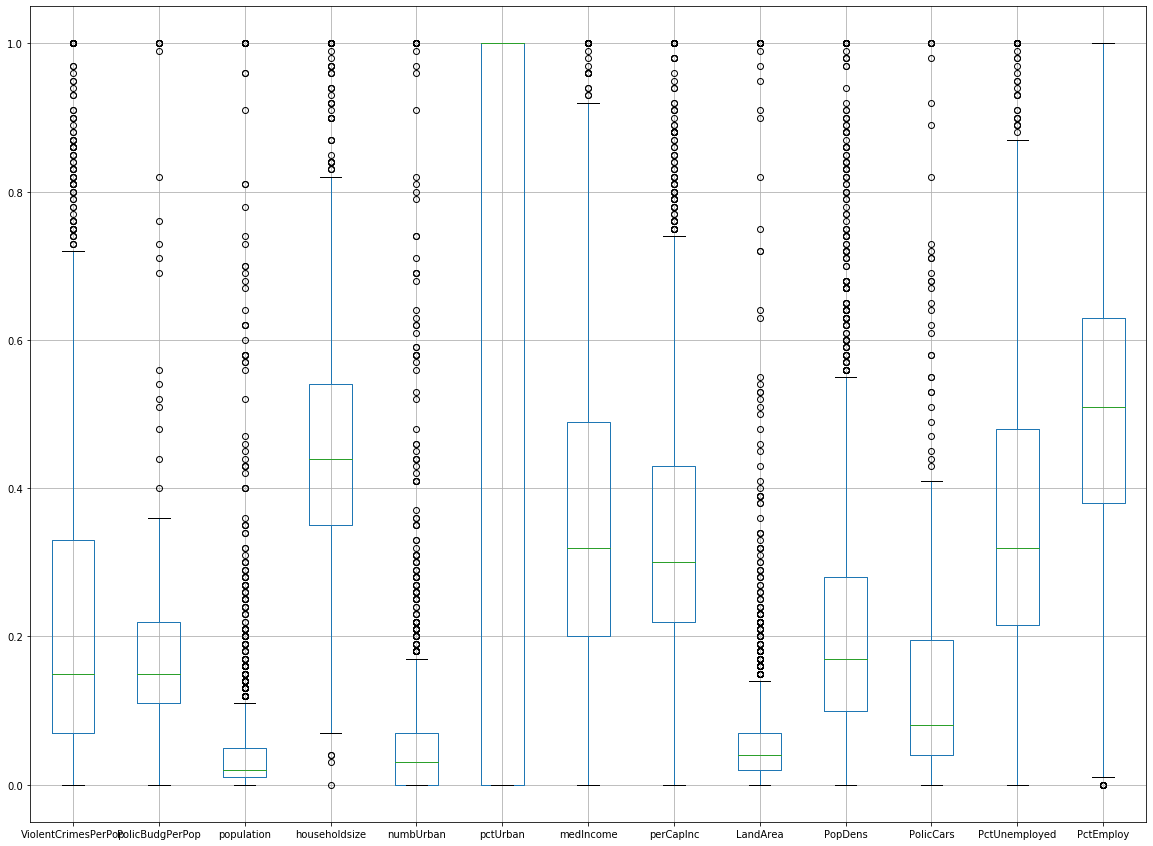

In [130]:
dataset.boxplot(figsize = (20, 15))

### Answer

In [20]:
def calc_MSE(dataset, imputation_method):
    X = dataset.drop(['ViolentCrimesPerPop'],axis=1)
    Y = dataset['ViolentCrimesPerPop']

    X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)

    reg = linear_model.LinearRegression()
    reg.fit(X_train, Y_train)
    Y_pred = reg.predict(X_test)
    print("MSE on test set using {} =".format(imputation_method),metrics.mean_squared_error(Y_test, Y_pred)) 

In [21]:
dataset = pd.read_csv('q3_dataset.csv')
dataset.dropna(inplace = True)
calc_MSE(dataset, "drop all NaN")

MSE on test set using drop all NaN = 0.047526237457769516


In [22]:
dataset = pd.read_csv('q3_dataset.csv')
dataset = dataset.apply(lambda x: x.fillna(x.mean()),axis=0)
calc_MSE(dataset, "fill NaN with mean")

MSE on test set using fill NaN with mean = 0.035335626268888705


In [23]:
dataset = pd.read_csv('q3_dataset.csv')
dataset = dataset.apply(lambda x: x.fillna(x.median()),axis=0)
calc_MSE(dataset, "fill NaN with median")

MSE on test set using fill NaN with median = 0.03511888876309373


In [24]:
dataset = pd.read_csv('q3_dataset.csv')
for column in dataset.columns:
    dataset[column].fillna(dataset[column].mode()[0], inplace=True)
calc_MSE(dataset, "fill NaN with mode")

MSE on test set using fill NaN with mode = 0.034906491981986754


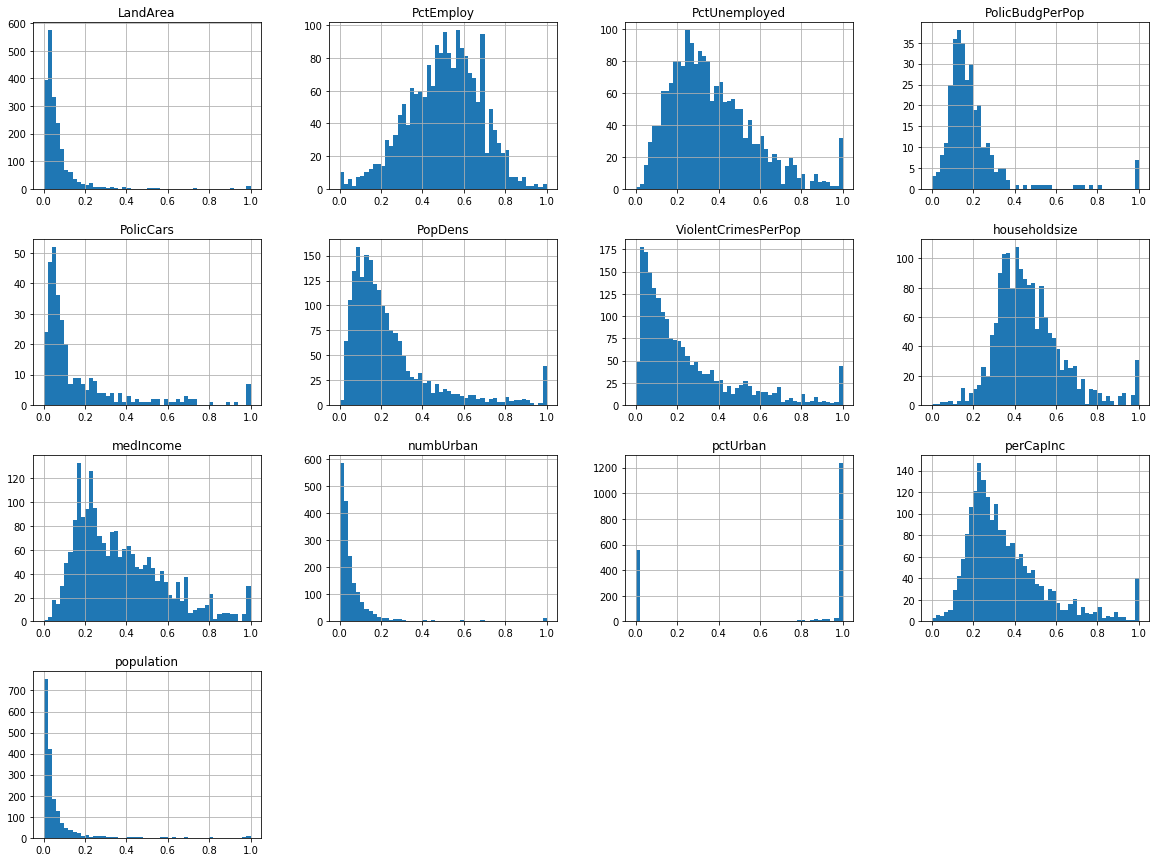

In [25]:
dataset = pd.read_csv('q3_dataset.csv')
dataset.hist(bins = 50, figsize = (20, 15))
plt.show()

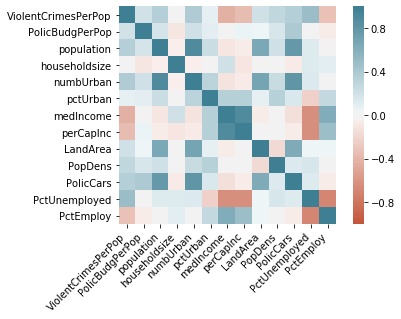

In [37]:
import seaborn as sns
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [27]:
def mean_median_mode(dataset):    
    dataset["PolicBudgPerPop"] = dataset["PolicBudgPerPop"].fillna(dataset["PolicBudgPerPop"].mode()[0])
    dataset["population"] = dataset["population"].fillna(dataset["population"].mode()[0])
    dataset["householdsize"] = dataset["householdsize"].fillna(dataset["householdsize"].median())
    dataset["numbUrban"] = dataset["numbUrban"].fillna(dataset["numbUrban"].mode()[0])
    dataset["PolicCars"] = dataset["PolicCars"].fillna(dataset["PolicCars"].mode()[0])
    dataset["PctUnemployed"] = dataset["PctUnemployed"].fillna(dataset["PctUnemployed"].median())
    dataset["PctEmploy"] = dataset["PctEmploy"].fillna(dataset["PctEmploy"].mean())

In [28]:
mean_median_mode(dataset)
calc_MSE(dataset, "fill NaN with mean median or mode based on distribution")

MSE on test set using fill NaN with mean median or mode based on distribution = 0.034887328933788396


In [127]:
dataframe = pd.read_csv('q3_dataset.csv')
dataframe['PolicBudgPerPop_d'] = dataframe.PolicBudgPerPop.isnull().astype(int)
dataframe['population_d'] = dataframe.population.isnull().astype(int)
dataframe['householdsize_d'] = dataframe.householdsize.isnull().astype(int)
dataframe['numbUrban_d'] = dataframe.numbUrban.isnull().astype(int)
dataframe['PolicCars_d'] = dataframe.PolicCars.isnull().astype(int)
dataframe['PctUnemployed_d'] = dataframe.PctUnemployed.isnull().astype(int)
dataframe['PctEmploy_d'] = dataframe.PctEmploy.isnull().astype(int)

mean_median_mode(dataframe)
calc_MSE(dataframe, "create dummy for NaN valued variables then fill NaN with mean, median, mode")

import statsmodels.api as sm
from scipy import stats

X = dataframe.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataframe['ViolentCrimesPerPop']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)

est = sm.OLS(Y_train, X_train)
est2 = est.fit()
print(est2.summary())

MSE on test set using create dummy for NaN valued variables then fill NaN with mean, median, mode = 0.03444185096464346
                                 OLS Regression Results                                 
Dep. Variable:     ViolentCrimesPerPop   R-squared (uncentered):                   0.723
Model:                             OLS   Adj. R-squared (uncentered):              0.719
Method:                  Least Squares   F-statistic:                              211.1
Date:                 Wed, 02 Oct 2019   Prob (F-statistic):                        0.00
Time:                         14:29:43   Log-Likelihood:                          467.46
No. Observations:                 1395   AIC:                                     -900.9
Df Residuals:                     1378   BIC:                                     -811.8
Df Model:                           17                                                  
Covariance Type:             nonrobust                                         

In [128]:
from sklearn.linear_model import HuberRegressor
#this was to check if there were any outliers that OLS was being baised by looks like there were no outliers
huber = HuberRegressor()
huber.fit(X_train, Y_train)
Y_pred = huber.predict(X_test)
print("MSE on test set using huber loss =",metrics.mean_squared_error(Y_test, Y_pred)) 

MSE on test set using huber loss = 0.03669644491415679


In [43]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import Imputer
import numpy as np
import pandas as pd

#got this class from https://github.com/jeweinberg/Pandas-MICE

class MiceImputer:
    
    model_dict_ = {}
    
    def __init__(self, seed_nulls=False, seed_strategy='mean'):
        self.seed_nulls = seed_nulls
        self.seed_strategy = seed_strategy
        
    
    def transform(self, X):
        col_order = X.columns
        new_X = []
        mutate_cols = list(self.model_dict_.keys())
        
        for i in mutate_cols:
            y = X[i]
            x_null = X[y.isnull()]
            y_null = y[y.isnull()].reset_index()['index']
            y_notnull = y[y.notnull()]
            
            model = self.model_dict_.get(i)
            
            if self.seed_nulls:
                x_null = model[1].transform(x_null)
            else:
                null_check = x_null.isnull().any()
                x_null = x_null[null_check.index[~null_check]]
            
            pred = pd.concat([pd.Series(model[0].predict(x_null))\
                              .to_frame()\
                              .set_index(y_null),y_notnull], axis=0)\
                              .rename(columns={0: i})
            
            new_X.append(pred)

        new_X.append(X[X.columns.difference(mutate_cols)])

        final = pd.concat(new_X, axis=1)[col_order]

        return final
        
        
    def fit(self, X):      
        x = X.fillna(value=np.nan)

        null_check = x.isnull().any()
        null_data = x[null_check.index[null_check]]
        
        for i in null_data:
            y = null_data[i]
            y_notnull = y[y.notnull()]

            model_list = []
            if self.seed_nulls:
                imp = Imputer(strategy=self.seed_strategy)
                model_list.append(imp.fit(x))
                non_null_data = pd.DataFrame(imp.fit_transform(x))
                
            else:
                non_null_data = x[null_check.index[~null_check]]
                
            
            x_notnull = non_null_data[y.notnull()]
            
            if y.nunique() > 2:
                model = LinearRegression()
                model.fit(x_notnull, y_notnull)
                model_list.insert(0, model)
                self.model_dict_.update({i: model_list})
            else:
                model = LogisticRegression()
                model.fit(x_notnull, y_notnull)
                model_list.insert(0, model)
                self.model_dict_.update({i: model_list})

        return self
        

    def fit_transform(self, X):
        return self.fit(X).transform(X)

In [55]:
dataframe = pd.read_csv('q3_dataset.csv')

X = dataframe.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataframe['ViolentCrimesPerPop']

Mice = MiceImputer()
Mice.fit(X)
X_t = Mice.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X_t,Y,test_size = 0.30, random_state=11)

reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print("MSE on test set using MICE Imputer =",metrics.mean_squared_error(Y_test, Y_pred)) 

MSE on test set using MICE Imputer = 0.03526972109961684


In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

dataframe = pd.read_csv('q3_dataset.csv')

X_train, X_test, Y_train, Y_test = train_test_split(X_t,Y,test_size = 0.30, random_state=11)

forest_clf = RandomForestRegressor(n_estimators=100, random_state=42)
forest_clf.fit(X_train, Y_train)
Y_pred = forest_clf.predict(X_test)
print("MSE on test set using Random forest =",metrics.mean_squared_error(Y_test, Y_pred)) 

MSE on test set using Random forest = 0.03452025015025042


Overall the best model was one where I replaced the NaN values of a column based the distribution of the variable. If the variable was normally distributed with no outliers, I used the mean. If there were outliers, i used the median. If the variable distribution looked nothing like a normal distribution, I used the mode. I also created dummy variables for if a column was missing or not. Using dummy variables will try to account for the missing data being MNAR. 

Mean, Median and Mode imputation diminishes any correlations involving the variable(s) that are imputed. This is because we assume that there is no relationship between the imputed variable and any other measured variables. looking at the correlation matrix, this is a bad assumption especially when it comes population and numbUrban. Do we just drop these variables since both have missing values, try to combine them, or accept the bais that comes with replacing them with mean, median, or mode? 

Missing Not at Random, MNAR, means there is a relationship between the propensity of a value to be missing and its values. In this data set PolicBudgPerPop is MNAR since the dummy variable for it in the regression is a significant predictor of ViolentCrimesPerPop. MICE assumes that the missing data are Missing at Random (MAR), which means that the probability that a value is missing depends only on observed value and can be predicted using them. It imputes data on a variable by variable basis by specifying an imputation model per variable. This is not the case in this dataset and probably why it does not outpreform our best model. 

# Question 4. PCA (conceptual) (5pts)

True of False : The goal of PCA is to create a lower-dimensional representation with principal components that are best at predicting the output variable.
Justify your answer

Answer: False: PCA is a method of feature extraction. Its goal is to summarize the correlations among the observed variables with a smaller set of linear combinations. Sometimes, PCA is just used for unsupervised learning, so there is not even an output variable. If you do have a supervised learning problem and have many independent variables, PCA can reduce your risk of overfitting your data or violating assumptions of the model you are using like assuring that your variables are independent of each other. This can help with reducing your error and could lead to your best model but it is not the goal of PCA. 